<h3> Lending club Case study </h3>

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sketch 
import seaborn as sns

df = pd.read_csv('loan.csv')

# dropping columns with complete null values
df.dropna(axis=1, how='all', inplace=True)

# Drop columns where all values are zeros
df = df.loc[:, (df != 0).any(axis=0)]

df['application_type'].value_counts()
# drop application_type column as it has no significance
df.drop('application_type',axis=1,inplace=True)
df['pymnt_plan'].value_counts()
# drop pymnt_plan column as it has no significance - it has only value n
df.drop('pymnt_plan',axis=1,inplace=True)
df.drop('url',axis=1,inplace=True)
df.drop('desc',axis=1,inplace=True)
# dropping columns with less significance and 
df.drop('title',axis=1,inplace=True)
df.drop('initial_list_status',axis=1,inplace=True)
df.drop('tax_liens',axis=1,inplace=True)
df.drop('policy_code',axis=1,inplace=True)
df.drop('chargeoff_within_12_mths',axis=1,inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_18052\1892188551.py:7: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


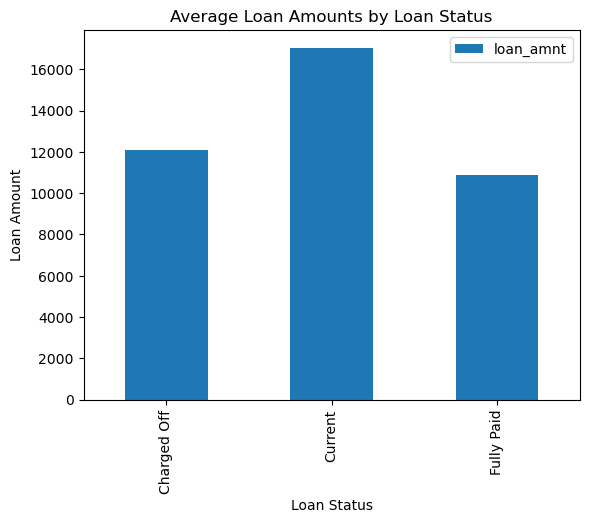

In [476]:

pivot_table1 = df.pivot_table(values='loan_amnt', index='loan_status',  aggfunc='mean')
pivot_table1.plot(kind='bar')
plt.title('Average Loan Amounts by Loan Status')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
plt.show()



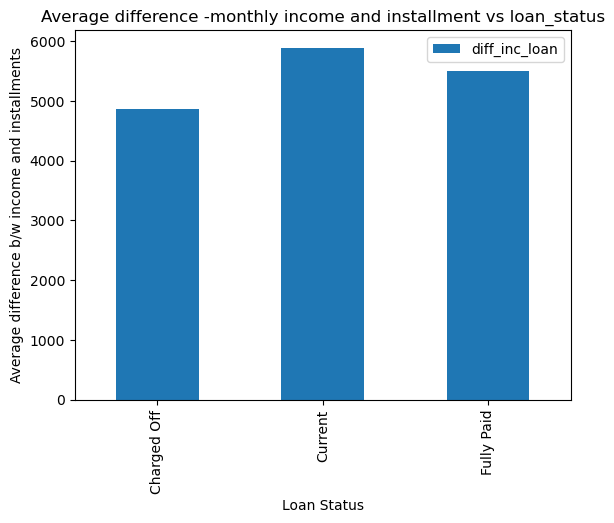

In [477]:

# Probability default based on monthly income vs monthly installments for loan
df['diff_inc_loan']=(df['annual_inc']/12)-df['installment']
pivot_instalmnt_status = df.pivot_table(values='diff_inc_loan', index='loan_status',  aggfunc='mean')
pivot_instalmnt_status.plot(kind='bar')
plt.title('Average difference -monthly income and installment vs loan_status')
plt.ylabel('Average difference b/w income and installments')
plt.xlabel('Loan Status')
plt.show()

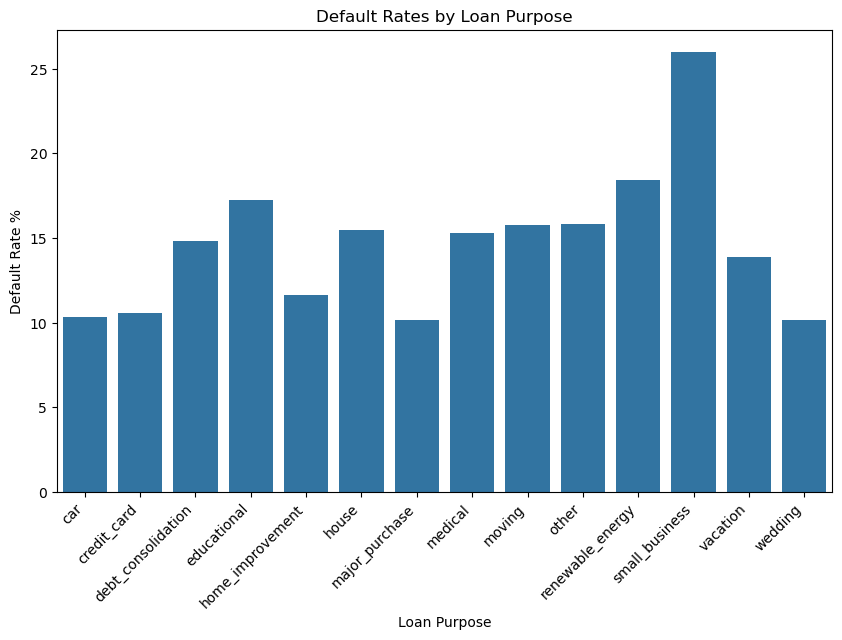

In [478]:
# purpose of loan vs defauls
default_rates = df.groupby('purpose')['loan_status'].apply(lambda x: (x == 'Charged Off').mean()*100).reset_index(name='default_rate')

plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='default_rate', data=default_rates)
plt.title('Default Rates by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate %')
plt.xticks(rotation=45, ha='right')
plt.show()

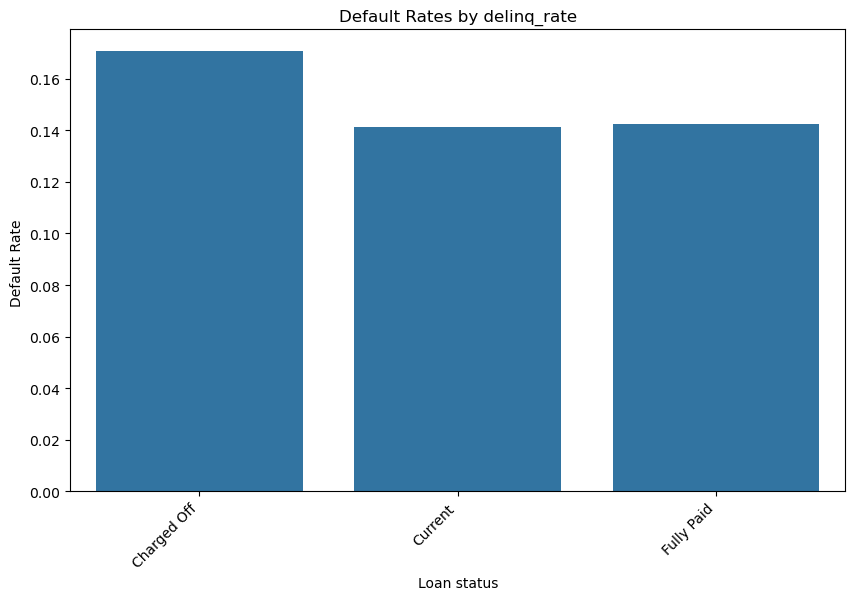

In [479]:
# delinq_2yrs based analysis , if there are more number of deferred payments, more chances of defaults
delinq_data = df.groupby('loan_status')['delinq_2yrs'].mean().reset_index(name='default_rate')
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='default_rate', data=delinq_data)
plt.title('Default Rates by delinq_rate')
plt.xlabel('Loan status')
plt.ylabel('Default Rate ')
plt.xticks(rotation=45, ha='right')
plt.show()

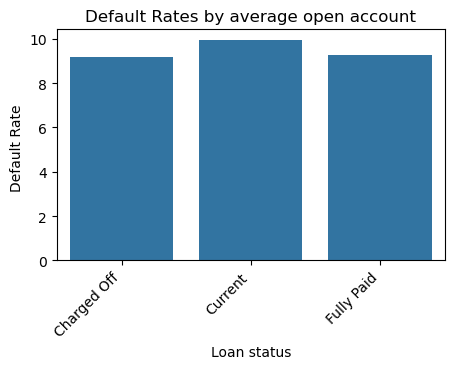

In [480]:
# open account based analysis , if there are more number of open accounts, more chances of defaults
open_acc_data = df.groupby('loan_status')['open_acc'].mean().reset_index(name='open_acc_avg')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='open_acc_avg', data=open_acc_data)
plt.title('Default Rates by average open account')
plt.xlabel('Loan status')
plt.ylabel('Default Rate ')
plt.xticks(rotation=45, ha='right')
plt.show()


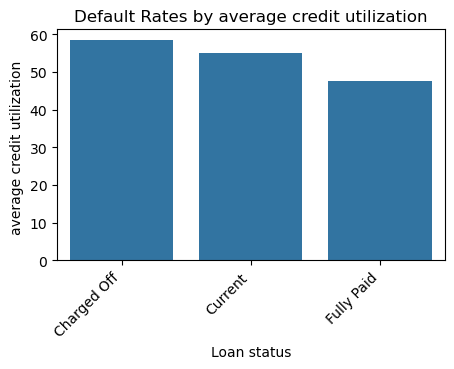

   loan_status  revol_util_avg
0  Charged Off           58.40
1      Current           54.95
2   Fully Paid           47.60


In [481]:
# Analysis based on revolving credit utilization
# clean thedata- convert the object to floating point by removing %
def Convert_percent_to_float(int_rate):
    if pd.isna(int_rate):
        return np.nan
    else:
        return float(int_rate.strip('%'))

df['revol_util'] = df['revol_util'].apply(Convert_percent_to_float)

revol_util_data = df.groupby('loan_status')['revol_util'].median().reset_index(name='revol_util_avg')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='revol_util_avg', data=revol_util_data)
plt.title('Default Rates by average credit utilization')
plt.xlabel('Loan status')
plt.ylabel('average credit utilization ')
plt.xticks(rotation=45, ha='right')
plt.show()
print(revol_util_data)

